In [174]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
plt.style.use("ggplot")
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install sklearn

In [3]:
!pip install --user imbalanced-learn==0.5

In [4]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\umesh\anaconda3\lib\site-packages (0.24.1)


In [ ]:
!pip install imbalanced-learn --user

In [ ]:
conda install -c glemaitre imbalanced-learn

In [ ]:
!pip install catboost

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

C:\Users\Umesh\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
pd.set_option("display.max_columns", 30)

In [9]:
data=pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

In [10]:
data.shape


(7043, 21)

In [11]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
data.Churn.value_counts()/data.shape[0]

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [14]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [19]:
print(data.gender.value_counts())


Male      3555
Female    3488
Name: gender, dtype: int64


In [20]:
l1= []
for x in data.columns:
    if data[x].dtypes=="O":
        l1.append(x)
    pass
print(l1)
print(len(l1))

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
18


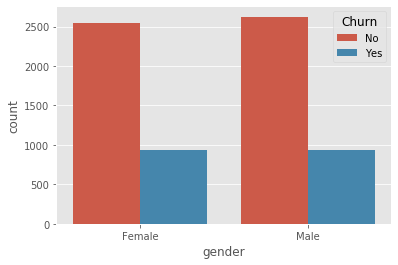

In [21]:
sns.countplot(x="gender",data =data,hue="Churn")

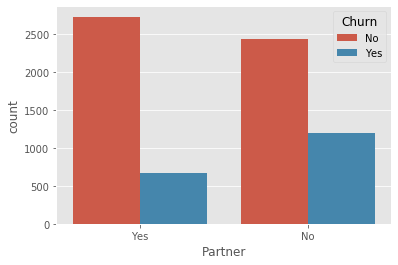

In [22]:
sns.countplot(x="Partner",data =data,hue="Churn") 

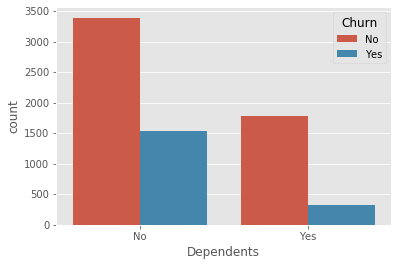

In [23]:
sns.countplot(x="Dependents",data =data,hue="Churn") 

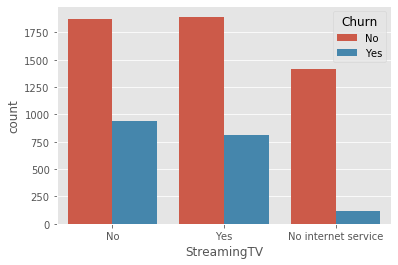

In [24]:
sns.countplot(x="StreamingTV",data =data,hue="Churn") 

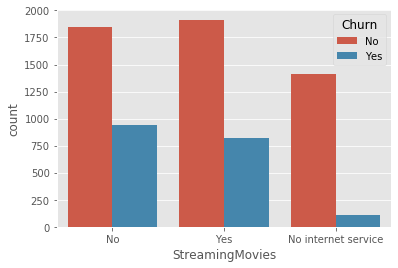

In [25]:
sns.countplot(x="StreamingMovies",data =data,hue="Churn") 

C:\Users\Umesh\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


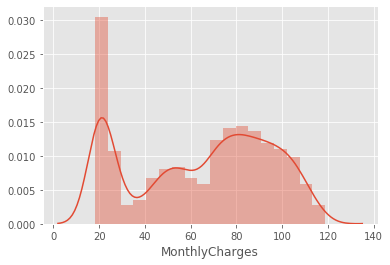

In [26]:
sns.distplot(a=data["MonthlyCharges"])

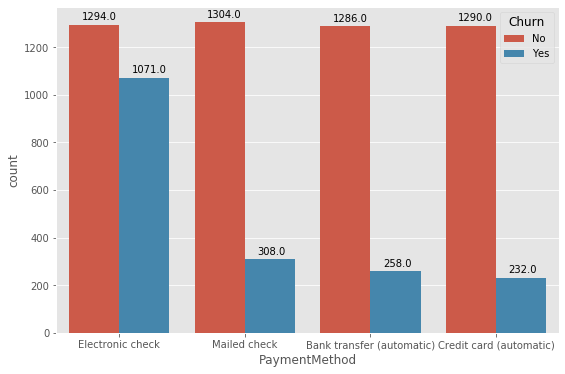

In [27]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x="PaymentMethod",data =data,hue="Churn")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))

In [28]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
data.loc[(data["PaymentMethod"]=="Electronic check")]["Churn"].value_counts()

No     1294
Yes    1071
Name: Churn, dtype: int64

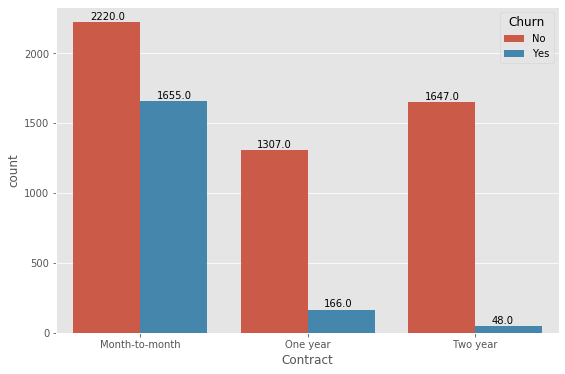

In [30]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x="Contract",data =data,hue="Churn")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))

In [31]:
# High Churn Rate among Month to Month Customers as well as among Electronic check

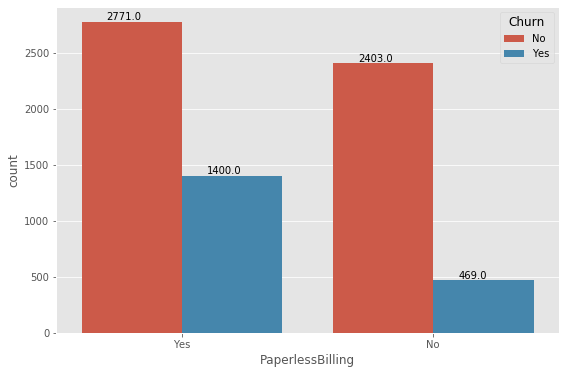

In [32]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x="PaperlessBilling",data =data,hue="Churn")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))

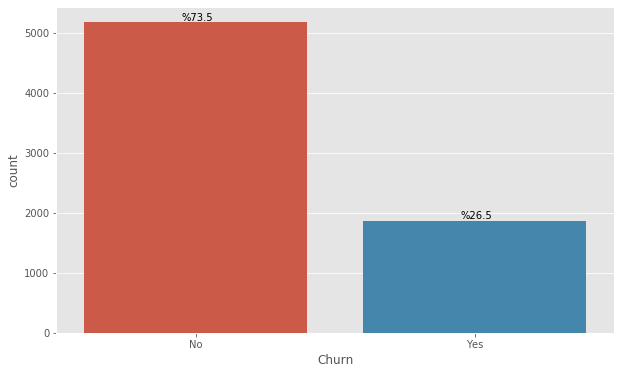

In [33]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="Churn",data=data)
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(100*(p.get_height()/len(data["Churn"]))), (p.get_x()+0.35, p.get_height()+35))

In [34]:
churn_data=data.groupby(["Contract","Churn"]).size().unstack()

In [35]:
churn_data.T.sum()

Contract
Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

In [36]:
(churn_data.T*100.0 / churn_data.T.sum()).T

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


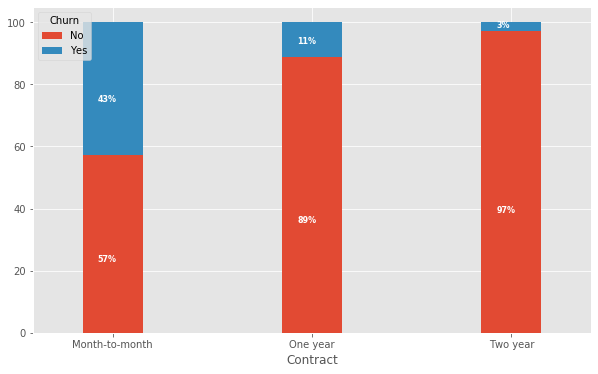

In [37]:
ax = (churn_data.T*100.0 / churn_data.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                )


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 8)

<Figure size 864x576 with 0 Axes>

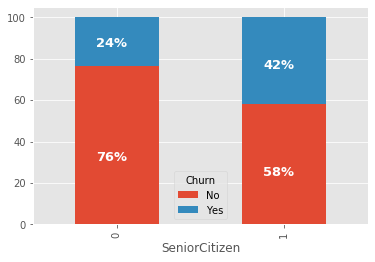

In [38]:
fig=plt.figure(figsize=(12,8))
Senior_data=data.groupby(["SeniorCitizen", "Churn"]).size().unstack()

ax=(Senior_data.T*100/Senior_data.T.sum()).T.plot(kind="bar",stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 13)
    

In [39]:
# Senior citizen have higher chanbce of Churning

C:\Users\Umesh\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Umesh\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

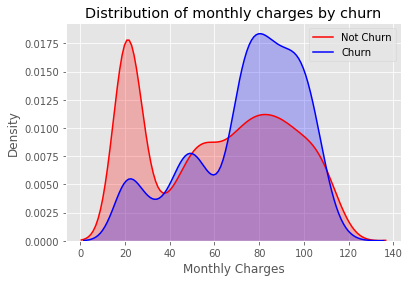

In [40]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [41]:
# People who are paying lower monthly charges have higher chances of Churning

In [42]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
data.drop(labels="customerID",axis=1,inplace=True)

In [44]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
data.shape

(7043, 20)

In [47]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [49]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'],errors='coerce',)

In [50]:
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [51]:
data.fillna(data["TotalCharges"].median(),inplace=True)

In [52]:
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [53]:
data["TotalCharges"].median()

1397.475

In [54]:
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [55]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [56]:
data=pd.get_dummies(data,drop_first=True)

In [57]:
data.shape

(7043, 31)

In [58]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [59]:
y=data["Churn_Yes"]

In [60]:
data.drop(labels="Churn_Yes",inplace=True,axis=1)

In [61]:
data.shape

(7043, 30)

In [62]:
Scaler=MinMaxScaler()

In [63]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=42,stratify=y)

In [66]:
Scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
X_train_scaled=Scaler.transform(X_train)

In [68]:
X_test_scaled=Scaler.transform(X_test)

In [69]:
y_test.value_counts()/len(y_test)

0    0.73481
1    0.26519
Name: Churn_Yes, dtype: float64

In [70]:
y_train.value_counts()/len(y_train)

0    0.73457
1    0.26543
Name: Churn_Yes, dtype: float64

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [144]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],           
               ['AdaBoostClassifier :', AdaBoostClassifier()],  
               ['XGB :', XGBClassifier()],
               ['GBC :', GradientBoostingClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train_scaled, y_train)
    predictions = classifier.predict(X_test_scaled)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("------------")
    print("------------")

DecisionTree : 0.7370812038614424
             precision    recall  f1-score   support

          0       0.82      0.82      0.82      1294
          1       0.50      0.52      0.51       467

avg / total       0.74      0.74      0.74      1761

------------
------------
RandomForest : 0.7802385008517888
             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1294
          1       0.62      0.44      0.51       467

avg / total       0.77      0.78      0.77      1761

------------
------------
Naive Bayes : 0.6609880749574105
             precision    recall  f1-score   support

          0       0.93      0.59      0.72      1294
          1       0.43      0.87      0.58       467

avg / total       0.79      0.66      0.68      1761

------------
------------
KNeighbours : 0.7546848381601363
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      1294
          1       0.54      0.54    

C:\Users\Umesh\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGB : 0.7915956842703009
             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1294
          1       0.63      0.51      0.57       467

avg / total       0.78      0.79      0.78      1761

------------
------------
GBC : 0.7932992617830777
             precision    recall  f1-score   support

          0       0.83      0.90      0.87      1294
          1       0.65      0.48      0.55       467

avg / total       0.78      0.79      0.78      1761

------------
------------


In [145]:
'''
C=range(9,10)        # After Iterating the Value of C , Best Accuracy was found at C=9 ( Not shown)
for x in C:
    M1=LogisticRegression(C=x)
    M1.fit(X_train_scaled,y_train)
    print(accuracy_score(y_test,M1.predict(X_test_scaled)))
    print(classification_report(y_test,M1.predict(X_test_scaled)))
'''

'\nC=range(9,10)        # After Iterating the Value of C , Best Accuracy was found at C=9 ( Not shown)\nfor x in C:\n    M1=LogisticRegression(C=x)\n    M1.fit(X_train_scaled,y_train)\n    print(accuracy_score(y_test,M1.predict(X_test_scaled)))\n    print(classification_report(y_test,M1.predict(X_test_scaled)))\n'

In [ ]:
# Logistic Regression Turns out to be the best model With Accuracy of 80.60 and Recall of 56%

In [116]:
#Optimum Value of C=9

In [155]:
M=LogisticRegression(C=9)
M.fit(X_train_scaled,y_train)
print(accuracy_score(y_test,M.predict(X_test_scaled)))
print(classification_report(y_test,M.predict(X_test_scaled)))

f1_score(y_test,M.predict(X_test_scaled))

0.8069278818852924
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1294
          1       0.66      0.56      0.60       467

avg / total       0.80      0.81      0.80      1761



0.6046511627906976

In [148]:
# Using SMOTE for Unbalanced Dataset

In [149]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [150]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), M)

In [151]:
from collections import Counter

In [152]:
sm = SMOTE(random_state = 2,ratio=0.6) 
X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train.ravel())

In [105]:
X_train_res.shape

(6208, 30)

In [106]:
X_train.shape

(5282, 30)

In [107]:
y_train.value_counts()

0    3880
1    1402
Name: Churn_Yes, dtype: int64

In [108]:
pd.DataFrame(y_train_res).value_counts()

0    3880
1    2328
dtype: int64

In [156]:
M.fit(X_train_res, y_train_res)

LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
y_pred=M.predict(X_test_scaled)

In [158]:
log_loss(y_test,M.predict_proba(X_test_scaled))

0.4313552027161498

In [159]:
print(accuracy_score(y_test,y_pred))

0.7819420783645656


In [160]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.81      0.85      1294
          1       0.57      0.70      0.63       467

avg / total       0.80      0.78      0.79      1761



In [161]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6293436293436293
0.7819420783645656


In [ ]:
#We can See here that the Recall for the positive class has increased from 56% to 70% by using SMOTE ;
#Though the overall Accuracy has reduced from 80.69 to 78.2 but Since Positive class her matters more ( Churn). Recall is more important

In [273]:
from imblearn.under_sampling import NearMiss  #Trying NearMiss As an alternative for SMOTE
nr = NearMiss()                                        
  
X_train_miss, y_train_miss = nr.fit_sample(X_train_scaled, y_train.ravel()) 

In [274]:
pd.DataFrame(y_train_miss).value_counts()

1    1402
0    1402
dtype: int64

In [275]:
M.fit(X_train_miss, y_train_miss)
y_pred=M.predict(X_test_scaled)\

In [276]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.58      0.70      1294
          1       0.41      0.82      0.55       467

avg / total       0.77      0.64      0.66      1761



In [233]:
from imblearn.combine import SMOTEENN
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train_scaled, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 3880, 1: 1402})
After Counter({1: 2616, 0: 2012})


In [234]:
M.fit(X_train_smenn, y_train_smenn)
y_pred=M.predict(X_test_scaled)

In [235]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.64      0.76      1294
          1       0.46      0.87      0.60       467

avg / total       0.81      0.70      0.72      1761



In [236]:
print(f1_score(y_test,y_pred))

0.6044776119402985


In [237]:
print(accuracy_score(y_test,y_pred))

0.6990346394094265


In [153]:
# SMOTE Works better

In [175]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier(n_estimators=200)], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression(C=9)],           
               ['AdaBoostClassifier :', AdaBoostClassifier()],  
               ['XGB :', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train_res, y_train_res)
    predictions = classifier.predict(X_test_scaled)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))
    print(classification_report(y_test,predictions))
    print("              ")
    print("              ")

DecisionTree : 0.7279954571266326
             precision    recall  f1-score   support

          0       0.83      0.79      0.81      1294
          1       0.49      0.54      0.51       467

avg / total       0.74      0.73      0.73      1761

              
              
RandomForest : 0.7881885292447472
             precision    recall  f1-score   support

          0       0.84      0.88      0.86      1294
          1       0.61      0.54      0.58       467

avg / total       0.78      0.79      0.78      1761

              
              
Naive Bayes : 0.6649630891538898
             precision    recall  f1-score   support

          0       0.92      0.59      0.72      1294
          1       0.43      0.86      0.58       467

avg / total       0.79      0.66      0.68      1761

              
              
KNeighbours : 0.7336740488358887
             precision    recall  f1-score   support

          0       0.86      0.76      0.81      1294
          1       0.50  

In [163]:
   
Final_Model1=LogisticRegression(C=9)
Final_Model1.fit(X_train_res, y_train_res)
print(f1_score(y_test,Final_Model1.predict(X_test_scaled)))
print(accuracy_score(y_test,Final_Model1.predict(X_test_scaled)))
print(classification_report(y_test,Final_Model1.predict(X_test_scaled)))
print("              ")
print("              ")

0.6293436293436293
0.7819420783645656
             precision    recall  f1-score   support

          0       0.88      0.81      0.85      1294
          1       0.57      0.70      0.63       467

avg / total       0.80      0.78      0.79      1761

              
              


In [320]:
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[100,120,160,180,200,250,300,350,400,500],"max_depth":[2,4,5,6,7,8],"min_samples_leaf":[0.001,0.01,0.1,1]}

In [325]:
tree=RandomForestClassifier()
grid=GridSearchCV(estimator=tree,param_grid=params,)
grid.fit(X_train_res, y_train_res)
'''
print(f1_score(y_test,Final_Model2.predict(X_test_scaled)))
print(accuracy_score(y_test,Final_Model2.predict(X_test_scaled)))
print("              ")
print("              ")
'''    

'\nprint(f1_score(y_test,Final_Model2.predict(X_test_scaled)))\nprint(accuracy_score(y_test,Final_Model2.predict(X_test_scaled)))\nprint("              ")\nprint("              ")\n'

In [329]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 0.001, 'n_estimators': 400}

In [330]:
grid.best_score_

0.789465206185567

In [172]:
Final_Model2=RandomForestClassifier(max_depth= 8, min_samples_leaf= 0.001, n_estimators= 550,random_state=42)

Final_Model2.fit(X_train_res, y_train_res)
print(f1_score(y_test,Final_Model2.predict(X_test_scaled)))
print(accuracy_score(y_test,Final_Model2.predict(X_test_scaled)))
print(classification_report(y_test,Final_Model2.predict(X_test_scaled)))

0.6270833333333333
0.7967064168086314
             precision    recall  f1-score   support

          0       0.87      0.85      0.86      1294
          1       0.61      0.64      0.63       467

avg / total       0.80      0.80      0.80      1761



In [166]:

Final_Model3=MLPClassifier(random_state=42,hidden_layer_sizes=(70,),max_iter=250,alpha=0.1)
Final_Model3.fit(X_train_res, y_train_res)
print(f1_score(y_test,Final_Model3.predict(X_test_scaled)))  
print(accuracy_score(y_test,Final_Model3.predict(X_test_scaled)))



0.6178861788617886
0.7864849517319704


In [130]:
np.arange(10,20,1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [167]:
from sklearn.ensemble import VotingClassifier
Final_Model1=LogisticRegression(C=9)
Final_Model2=RandomForestClassifier(max_depth= 8, min_samples_leaf= 0.001, n_estimators= 550,random_state=42)
Final_Model3=MLPClassifier(random_state=42,hidden_layer_sizes=(70,),max_iter=250,alpha=0.1)

Voting=VotingClassifier(estimators=[("m1",Final_Model1),("m2",Final_Model2),("m3",Final_Model3)],voting="soft",n_jobs=-1)


In [176]:
Voting.fit(X_train_res, y_train_res)
print(f1_score(y_test,Voting.predict(X_test_scaled)))
print(accuracy_score(y_test,Voting.predict(X_test_scaled)))
print(classification_report(y_test,Voting.predict(X_test_scaled)))

0.6241276171485544
0.7859170925610448
             precision    recall  f1-score   support

          0       0.87      0.83      0.85      1294
          1       0.58      0.67      0.62       467

avg / total       0.80      0.79      0.79      1761



In [177]:
print(recall_score(y_test,Voting.predict(X_test_scaled)))

0.6702355460385439


In [178]:
from sklearn.metrics import log_loss

In [179]:
log_loss(y_test,Voting.predict_proba(X_test_scaled))

0.4258869126546946